In [1]:
# NB FOR RILEY; Make sure to install dependencies in /mnt and not /home
import os
import numpy as np  
import sys
from stl import mesh, main
from mpl_toolkits import mplot3d
from matplotlib import pyplot
import pyvista as pv

# Functions
def find_mins_maxs(obj): # Find bottom left and top right coordinates of the bounding box
    minx = obj.x.min()
    maxx = obj.x.max()
    miny = obj.y.min()
    maxy = obj.y.max()
    minz = obj.z.min()
    maxz = obj.z.max()
    return minx, maxx, miny, maxy, minz, maxz



   
# Points Validation
# Current possible method for removing points within boundaries:
# Create infinite ray from point i into any direction and calculate the amount of times the ray intersects triangles within the polyhedron
# If the amount of intersections is odd, then the point is within the boundary
# If the # of intersections is even, then the point is outside of the boundary
# Pseudocode from https://stackoverflow.com/questions/44513525/testing-whether-a-3d-point-is-inside-a-3d-polyhedron: 

"""
Inside(Polyhedron P, point q)
   Segment S = [q, q+(0,0,1e30)]
   count = 0
   For each triangle T of P
      If Intersect(S,T)
            count = count + 1
      End if
   End for
   return odd(count)
End

Intersect([q1,q2],(t1,t2,t3))
  s1 = orient3d(q1,t1,t2,t3)
  s2 = orient3d(q2,t1,t2,t3)
  // Test whether the two extermities of the segment
  // are on the same side of the supporting plane of
  // the triangle
  If(s1 == s2) 
     return false
  End if
  // Now we know that the segment 'straddles' the supporing
  // plane. We need to test whether the three tetrahedra formed
  // by the segment and the three edges of the triangle have
  // the same orientation
  s3 = orient3d(q1,q2,t1,t2)
  s4 = orient3d(q1,q2,t2,t3)
  s5 = orient3d(q1,q2,t3,t1)
  return (s3 == s4 AND s4 == s5)
End

Orient3d(a,b,c,d)
    // Computes the sign of the signed volume  
    // of the tetrahedron (a,b,c,d)
    return Sign( dot(cross(b-a,c-a),d-a) )
End
"""
# The following method is adapted from pyvista's documentation on the Moeller-Trumbore Method
def ray_triangle_intersection(ray_start, ray_vec, triangle):
   """Moeller–Trumbore intersection algorithm.

    Parameters
    ----------
    ray_start : np.ndarray
        Length three numpy array representing start of point.

    ray_vec : np.ndarray
        Direction of the ray.

    triangle : np.ndarray
        ``3 x 3`` numpy array containing the three vertices of a
        triangle.

    Returns
    -------
    bool
        ``True`` when there is an intersection.

    tuple
        Length three tuple containing the distance ``t``, and the
        intersection in unit triangle ``u``, ``v`` coordinates.  When
        there is no intersection, these values will be:
        ``[np.nan, np.nan, np.nan]``

   """
   

"\nInside(Polyhedron P, point q)\n   Segment S = [q, q+(0,0,1e30)]\n   count = 0\n   For each triangle T of P\n      If Intersect(S,T)\n            count = count + 1\n      End if\n   End for\n   return odd(count)\nEnd\n\nIntersect([q1,q2],(t1,t2,t3))\n  s1 = orient3d(q1,t1,t2,t3)\n  s2 = orient3d(q2,t1,t2,t3)\n  // Test whether the two extermities of the segment\n  // are on the same side of the supporting plane of\n  // the triangle\n  If(s1 == s2) \n     return false\n  End if\n  // Now we know that the segment 'straddles' the supporing\n  // plane. We need to test whether the three tetrahedra formed\n  // by the segment and the three edges of the triangle have\n  // the same orientation\n  s3 = orient3d(q1,q2,t1,t2)\n  s4 = orient3d(q1,q2,t2,t3)\n  s5 = orient3d(q1,q2,t3,t1)\n  return (s3 == s4 AND s4 == s5)\nEnd\n\nOrient3d(a,b,c,d)\n    // Computes the sign of the signed volume  \n    // of the tetrahedron (a,b,c,d)\n    return Sign( dot(cross(b-a,c-a),d-a) )\nEnd\n"

C:\Users\Riley Ylagan\AppData\Local\Temp\ipykernel_21336\1015509948.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  axes = mplot3d.Axes3D(figure)


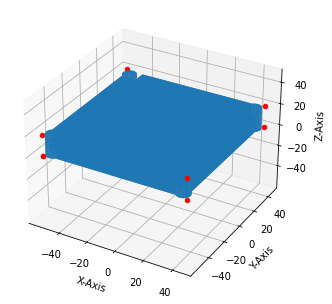

(711, 3)
-55.0
44.999996
-55.0
44.999996
-4.6629367e-15
20.0


In [2]:
# Create a new plot
figure = pyplot.figure()
axes = mplot3d.Axes3D(figure)
# Import maze mesh
your_mesh = mesh.Mesh.from_file('../data/first_iteration.STL')
axes.add_collection3d(mplot3d.art3d.Poly3DCollection(your_mesh.vectors))
minx, maxx, miny, maxy, minz, maxz = find_mins_maxs(your_mesh)
# Auto scale to the mesh size
scale = your_mesh.points.flatten()
axes.auto_scale_xyz(scale, scale, scale)
axes.scatter(minx,miny,minz,color='red')
axes.scatter(maxx,maxy,maxz,color='red')
axes.scatter(minx,maxy,minz,color='red')
axes.scatter(maxx,miny,maxz,color='red')
axes.scatter(minx,miny,maxz,color='red')
axes.scatter(minx,maxy,maxz,color='red')

axes.scatter(maxx,miny,minz,color='red')
axes.scatter(minx,miny,minz,color='red')
axes.scatter(minx,maxy,minz,color='red')
axes.scatter(maxx,maxy,minz,color='red')
axes.set_xlabel('X-Axis', rotation=45)
axes.set_ylabel('Y-Axis', rotation=45)
axes.set_zlabel('Z-Axis', rotation=45)
# Show the plot to the screen
pyplot.show()

#points = np.around(np.unique(your_mesh.vectors.reshape([int(your_mesh.vectors.size/3), 3]), axis=0),2)
#points.size
#print("Points are", points.tolist())
points = your_mesh.points.reshape([-1, 3])
# extract vertices of the triangle faces
point_list = np.unique(points, axis=0)
print(point_list.shape)
a_file = open("test.txt", "w")
for row in point_list:
    np.savetxt(a_file, [row])

a_file.close()


print(minx)
print(maxx)
print(miny)
print(maxy)
print(minz)
print(maxz)
# Bottom left and top right of bounding box

100
100
20


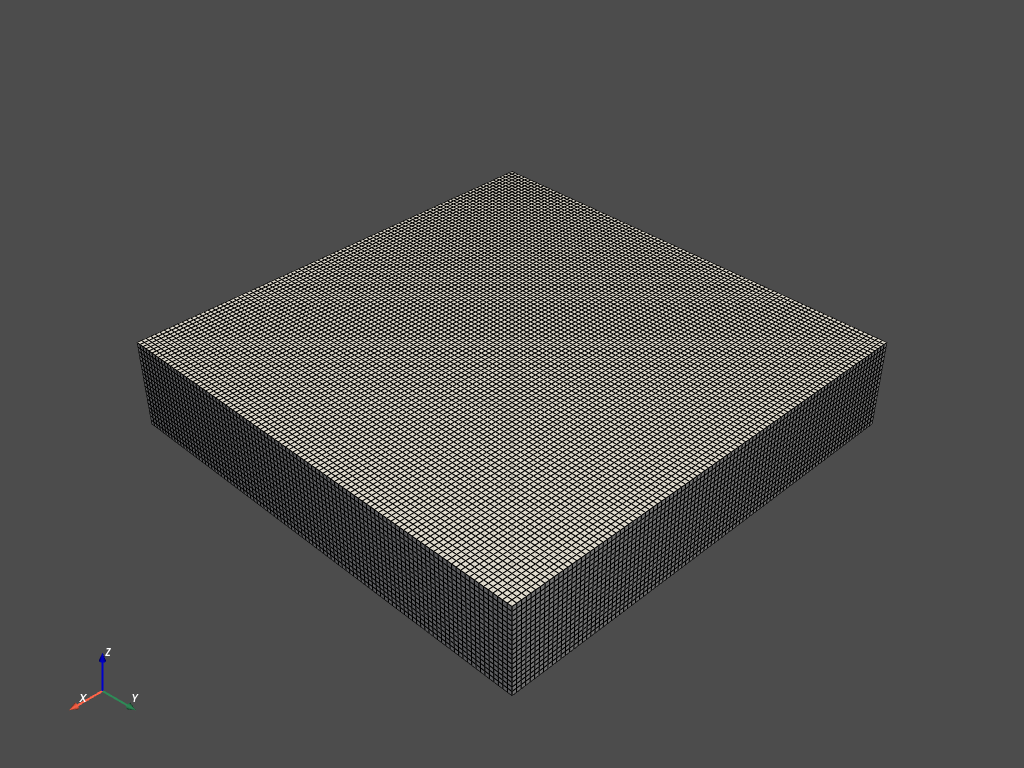

[[-5.5000000e+01 -5.5000000e+01 -4.6629367e-15]
 [-5.4000000e+01 -5.5000000e+01 -4.6629367e-15]
 [-5.3000000e+01 -5.5000000e+01 -4.6629367e-15]
 ...
 [ 4.2000000e+01  4.4000000e+01  1.9000000e+01]
 [ 4.3000000e+01  4.4000000e+01  1.9000000e+01]
 [ 4.4000000e+01  4.4000000e+01  1.9000000e+01]]
[[-5.5000000e+01 -5.5000000e+01 -4.6629367e-15]
 [-5.4000000e+01 -5.5000000e+01 -4.6629367e-15]
 [-5.3000000e+01 -5.5000000e+01 -4.6629367e-15]
 ...
 [ 4.2000000e+01  4.4000000e+01  1.9000000e+01]
 [ 4.3000000e+01  4.4000000e+01  1.9000000e+01]
 [ 4.4000000e+01  4.4000000e+01  1.9000000e+01]]


In [19]:
xy = (maxx-minx)/(maxy-miny) # ratio between x and y distance
xz = (maxx-minx)/(maxz-minz) # ratio between x and z distance
yz = (maxy-miny)/(maxy-miny) # ratio between y and z distance
SF = 1 # 1/SF resolution
xdim = int((maxx-minx)/SF)
ydim = int((maxy-miny)/SF)
zdim = int((maxz-minz)/SF)
xyz_space = 1*SF

print(xdim)
print(ydim)
print(zdim)
grid = pv.UniformGrid(
    dims=(xdim, ydim, zdim),
    spacing=(xyz_space,xyz_space,xyz_space),
    origin=(minx, miny, minz),
)
type(grid.points)
grid.plot(show_edges=True)

x = grid.points[:,0]
y = grid.points[:,1]
z = grid.points[:,2]
print(grid.points)
a_file = open("test.txt", "w")
for row in grid.points:
    np.savetxt(a_file, [row])

a_file.close()

print(grid.points)


C:\Users\Riley Ylagan\AppData\Local\Temp\ipykernel_21336\4294353161.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  axes = mplot3d.Axes3D(figure)


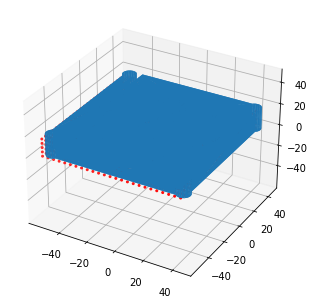

In [18]:
figure = pyplot.figure()
axes = mplot3d.Axes3D(figure)
your_mesh = mesh.Mesh.from_file('../data/first_iteration.STL')
axes.add_collection3d(mplot3d.art3d.Poly3DCollection(your_mesh.vectors))

# Auto scale to the mesh size
scale = your_mesh.points.flatten()
axes.auto_scale_xyz(scale, scale, scale)
axes.scatter(x,y,z,s=SF,color='red')
pyplot.show()

In [55]:
triangles = your_mesh.vectors
print(triangles)
#print(triangles[0][0])
#print(grid.points)

ray_start = grid.points[0]
ray_vec = np.array([0, 0, -1])
triangle = triangles[0]
#define a null intersection
null_inter = np.array([np.nan, np.nan, np.nan])

#break down triangle into individual points

v1, v2, v3 = triangle
print(v1)
print(v2)
print(v3)
eps = 0.000001

# compute edges
edge1 = v2 - v1
edge2 = v3 - v1
#print(edge1)
#print(edge2)
pvec = np.cross(ray_vec, edge2)
det = edge1.dot(pvec)
print(det)

intersect = True
if abs(det) < eps:  # no intersection
    intersect = False
inv_det = 1.0 / det
tvec = ray_start - v1
u = tvec.dot(pvec) * inv_det

if u < 0.0 or u > 1.0:  # if not intersection
    intersect = False

qvec = np.cross(tvec, edge1)
v = ray_vec.dot(qvec) * inv_det
if v < 0.0 or u + v > 1.0:  # if not intersection
    intersect = False

t = edge2.dot(qvec) * inv_det
if t < eps:
    intersect = False

intersect =True
print(np.array([t, u, v]))
print(intersect)


[[[-47.310577    8.748542   19.747234 ]
  [-47.310577   13.60291     7.8969193]
  [-47.310577   13.60291    19.745258 ]]

 [[-47.310577   16.515532   19.745258 ]
  [-47.310577    8.748542   19.747234 ]
  [-47.310577   13.60291    19.745258 ]]

 [[-47.310577  -26.202915    7.8969193]
  [-47.310577   -1.9310706   7.8969193]
  [-47.310577  -18.36787    19.747234 ]]

 ...

 [[-43.46154    -6.7854395  19.745258 ]
  [-43.46154    -6.7854395   7.8969193]
  [-43.46154   -18.547947   19.745258 ]]

 [[-43.46154     5.8359203   7.8969193]
  [-23.269232    5.8359203   7.8969193]
  [-43.46154     5.8359203  19.745258 ]]

 [[-43.46154     5.8359203  19.745258 ]
  [-23.269232    5.8359203  19.745258 ]
  [-43.46154     8.748542   19.745258 ]]]
[-47.310577   8.748542  19.747234]
[-47.310577   13.60291     7.8969193]
[-47.310577  13.60291   19.745258]
0.0
[-inf -inf  inf]
True


C:\Users\Riley Ylagan\AppData\Local\Temp\ipykernel_21336\1774370851.py:32: RuntimeWarning: divide by zero encountered in double_scalars
  inv_det = 1.0 / det
C:\Users\Riley Ylagan\AppData\Local\Temp\ipykernel_21336\1774370851.py:41: RuntimeWarning: invalid value encountered in double_scalars
  if v < 0.0 or u + v > 1.0:  # if not intersection
